# Customer Purchase Behavior Analysis

**Objective:**  
Analyze customer transaction data to uncover purchasing patterns and segment customers based on their shopping behavior.

**Approach:**  
- Perform **Frequent Itemset Mining** using the **Apriori Algorithm** to identify commonly co-purchased products.
- Conduct **Customer Segmentation** using:
  - **K-Means Clustering**
  - **Gaussian Mixture Models (GMM)**

**Concepts Used:**  
- RFM Analysis (Recency, Frequency, Monetary metrics)
- Data Preprocessing and Cleaning
- Frequent Itemsets and Association Rules
- Clustering Techniques
- Principal Component Analysis (PCA) for Visualization

**Dataset:**  
[Online Retail Dataset from the UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/352/online+retail)

---


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_excel("data/online_retail.xlsx")

In [67]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [68]:
print(df.shape)
print(df.info())
print(df.describe())

(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%        

Checking missing values here.

In [69]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Drop missing `CustomerID` rows and cancelled `InvoiceNo` and we know because they start with a 'c'.

We should also remove negative or zero `Quantity` and `UnitPrice`.

This is optional, but we should also remove missing descriptions.

In [70]:
df = df.dropna(subset=['CustomerID'])
df['CustomerID'] = df['CustomerID'].astype(int)
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df = df.dropna(subset=['Description'])

Let's check again here after we run the above code.

In [71]:
print(df.shape)
print(df.isnull().sum())

(397884, 8)
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# this groups by invoiceNo and description, then sum quantities
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)

# this converts quantities to 0 or 1, or whether the customer bought or not bought something
basket = basket.applymap(lambda x: 1 if x > 0 else 0)



/var/folders/2p/d_nj_y2s0p32_2p156bn343c0000gn/T/ipykernel_7765/154237625.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [73]:
basket.head(10)

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
536371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, let's run the A-priori

In [74]:
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [75]:
frequent_itemsets

,support,itemsets
0,0.021692,(3 STRIPEY MICE FELTCRAFT)
1,0.039175,(6 RIBBONS RUSTIC CHARM)
2,0.025146,(60 CAKE CASES VINTAGE CHRISTMAS)
3,0.035452,(60 TEATIME FAIRY CAKE CASES)
4,0.027034,(72 SWEETHEART FAIRY CAKE CASES)
...,...,...
238,0.023527,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY..."
239,0.024552,"(RED HANGING HEART T-LIGHT HOLDER, WHITE HANGI..."
240,0.022664,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU..."
241,0.025254,"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA..."


Then we have the association rules, which means what products are bought together most frequently.

In [76]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.047324,0.042575,0.028599,0.604333,14.194548,1.0,0.026584,2.419774,0.975725,0.466549,0.586738,0.638035
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.042575,0.047324,0.028599,0.671736,14.194548,1.0,0.026584,2.902169,0.970886,0.466549,0.655430,0.638035
2,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.033078,0.047324,0.021368,0.646003,13.650778,1.0,0.019803,2.691201,0.958448,0.361974,0.628419,0.548771
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.047324,0.033078,0.021368,0.451539,13.650778,1.0,0.019803,1.762974,0.972779,0.361974,0.432777,0.548771
4,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.033240,0.037988,0.022879,0.688312,18.119023,1.0,0.021617,3.086454,0.977294,0.473214,0.676004,0.645292
5,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.037988,0.033240,0.022879,0.602273,18.119023,1.0,0.021617,2.430711,0.982118,0.473214,0.588598,0.645292
6,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.040794,0.034265,0.024984,0.612434,17.873424,1.0,0.023586,2.491794,0.984201,0.498922,0.598683,0.670784
7,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.034265,0.040794,0.024984,0.729134,17.873424,1.0,0.023586,3.541254,0.977547,0.498922,0.717614,0.670784
8,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.037287,0.030002,0.024822,0.665702,22.188466,1.0,0.023703,2.901595,0.991917,0.584498,0.655362,0.746520
9,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030002,0.037287,0.024822,0.827338,22.188466,1.0,0.023703,5.575714,0.984468,0.584498,0.820651,0.746520


In [77]:
frequent_itemsets.sort_values(by='support', ascending=False).head(10) # most common combinations

,support,itemsets
192,0.106357,(WHITE HANGING HEART T-LIGHT HOLDER)
154,0.091895,(REGENCY CAKESTAND 3 TIER)
81,0.086337,(JUMBO BAG RED RETROSPOT)
124,0.074412,(PARTY BUNTING)
11,0.074196,(ASSORTED COLOUR BIRD ORNAMENT)
102,0.069501,(LUNCH BAG RED RETROSPOT)
166,0.061839,(SET OF 3 CAKE TINS PANTRY DESIGN )
139,0.059303,(POSTAGE)
95,0.056767,(LUNCH BAG BLACK SKULL.)
116,0.055526,(PACK OF 72 RETROSPOT CAKE CASES)


OK, now we have listed the most frequent bought **individual items** and now we need to plot those.

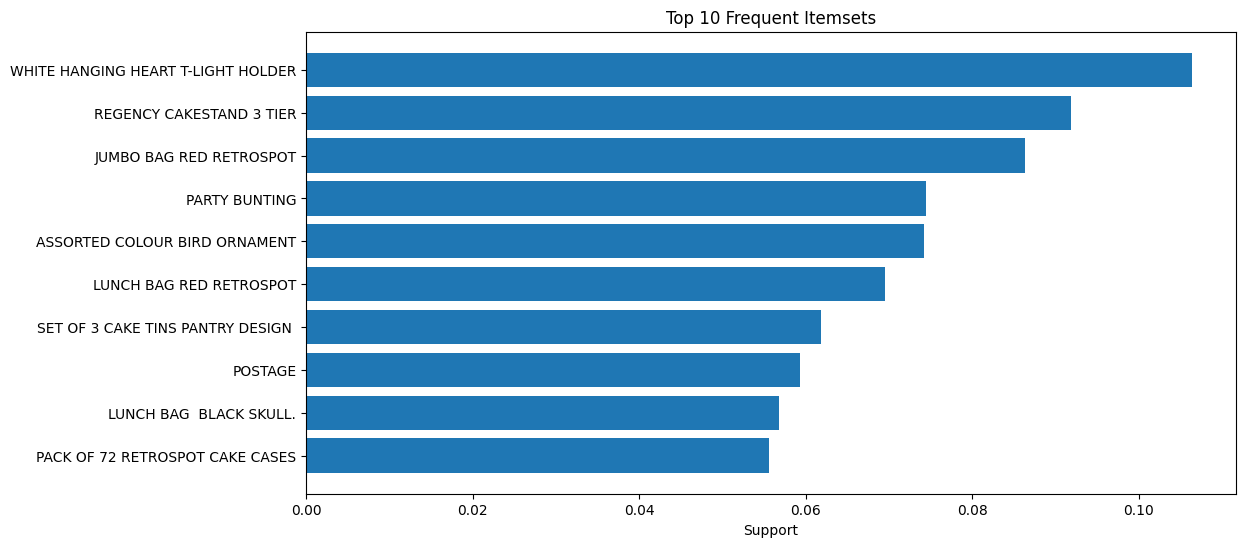

In [ ]:
# plotting the 10 most frequently bought items
import matplotlib.pyplot as plt
top_items = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.barh(range(len(top_items)), top_items['support'], align='center')
plt.yticks(range(len(top_items)), [', '.join(x) for x in top_items['itemsets']])
plt.xlabel('Support')
plt.title('Top 10 Frequent Itemsets')
plt.gca().invert_yaxis()
plt.show()


But, how about pairs, triplets, etc. of items? Yes we can with apriori. After that, we are going to plot.

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# run apriori
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# filter only those of 2 items or more
frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) >= 2)]

# sort by the frequent pairs bought
frequent_itemsets.sort_values(by='support', ascending=False).head(10)

# prints results
print(frequent_itemsets.head(10))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


      support                                           itemsets
207  0.028599  (ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELI...
208  0.021368  (ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...
209  0.022879        (DOLLY GIRL LUNCH BOX, SPACEBOY LUNCH BOX )
210  0.024984  (GARDENERS KNEELING PAD KEEP CALM , GARDENERS ...
211  0.024822  (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...
212  0.020181  (REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...
213  0.029193  (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...
214  0.021962     (HEART OF WICKER LARGE, HEART OF WICKER SMALL)
215  0.029463  (JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...
216  0.022340    (JUMBO BAG STRAWBERRY, JUMBO BAG RED RETROSPOT)


In [80]:
# Already filtered to length >= 2
frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) >= 2)]

In [ ]:
top_pairs = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
top_pairs['itemsets_str'] = top_pairs['itemsets'].apply(lambda x: ', '.join(list(x))) # seperate different items by a comma

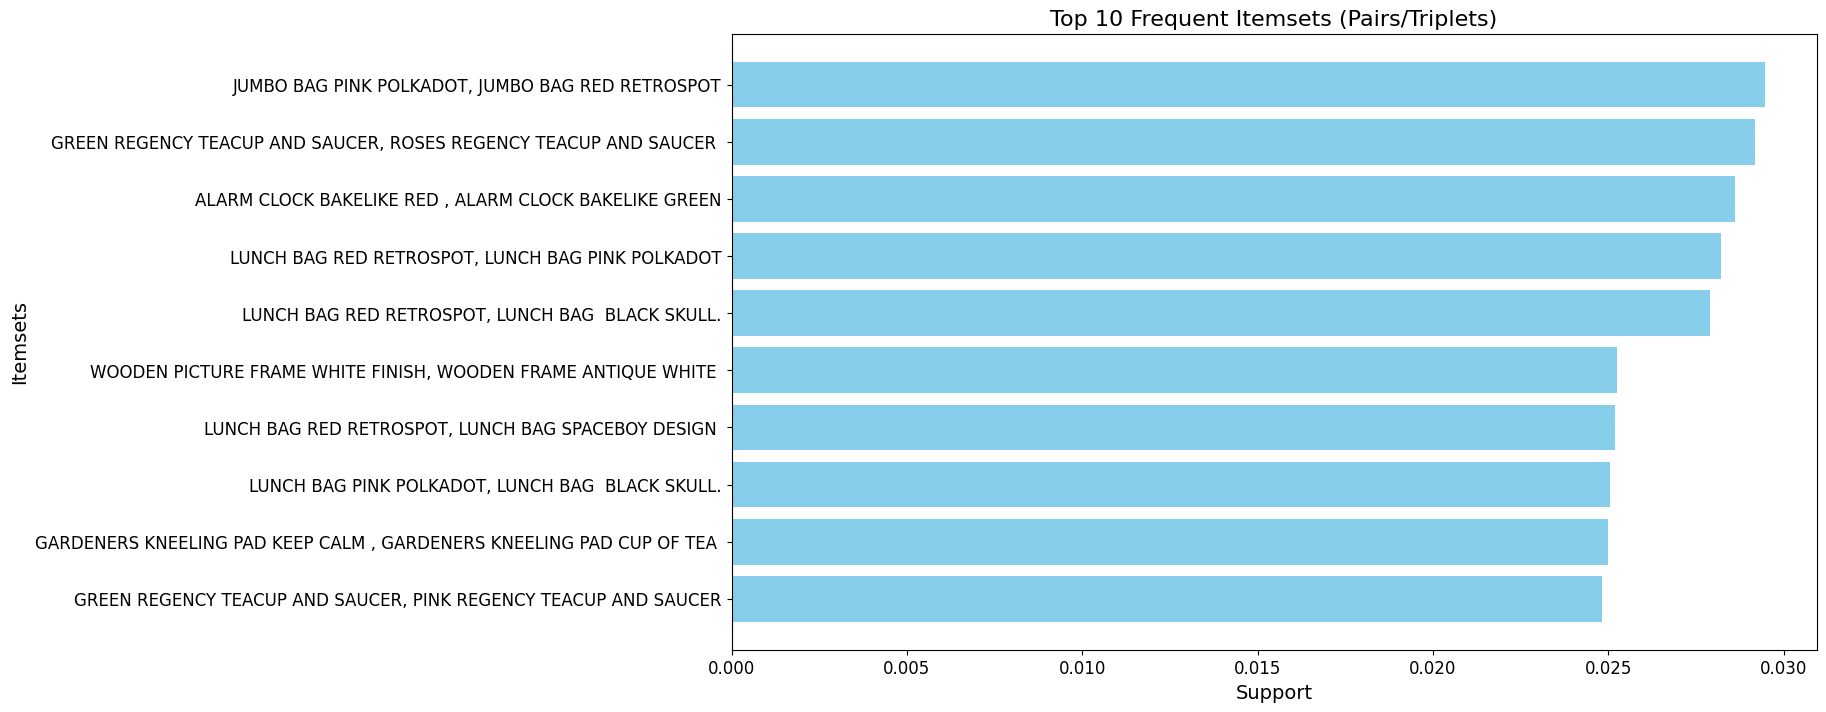

In [82]:
plt.figure(figsize=(14,8))
bars = plt.barh(top_pairs['itemsets_str'], top_pairs['support'], color='skyblue')
plt.xlabel('Support', fontsize=14)
plt.ylabel('Itemsets', fontsize=14)
plt.title('Top 10 Frequent Itemsets (Pairs/Triplets)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()
plt.show()



In [83]:
frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) >= 2)]

frequent_itemsets['itemsets_str'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(sorted(list(x))))


top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(20)


print(top_itemsets[['support', 'itemsets_str']])

      support                                       itemsets_str
215  0.029463   JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROSPOT
213  0.029193  GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY...
207  0.028599  ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELI...
230  0.028221   LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROSPOT
222  0.027898   LUNCH BAG  BLACK SKULL., LUNCH BAG RED RETROSPOT
241  0.025254  WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE FR...
231  0.025200  LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY DE...
221  0.025038   LUNCH BAG  BLACK SKULL., LUNCH BAG PINK POLKADOT
210  0.024984  GARDENERS KNEELING PAD CUP OF TEA , GARDENERS ...
211  0.024822  GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY ...
227  0.024714       LUNCH BAG CARS BLUE, LUNCH BAG RED RETROSPOT
239  0.024552  RED HANGING HEART T-LIGHT HOLDER, WHITE HANGIN...
236  0.024336  PAPER CHAIN KIT 50'S CHRISTMAS , PAPER CHAIN K...
232  0.024282    LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIGN 
238  0.023527  PINK REGEN

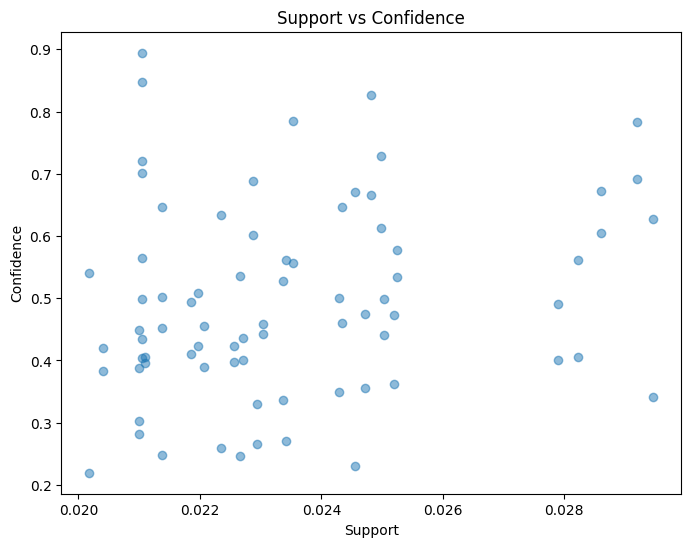

In [84]:
rules.sort_values(by='lift', ascending=False).head(10) # rules we generated
# Plot lift vs confidence
plt.figure(figsize=(8,6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()


Now that we have an idea on what combination of items are bought together, we can move on to k-means algorithm where:
- we are going to group customers based on shopping behavior.

We are going to do so by creating features for each CustomerID.
Let’s calculate RFM features:

- R = Recency (how recent was their last purchase)

- F = Frequency (how often they purchased)

- M = Monetary (how much they spent)

This is a classic technique called **RFM Analysis**.

In [85]:
import datetime as dt

snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1) # we need a data to calculate Recency from


In [86]:
# Group by CustomerID
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'UnitPrice': 'sum'
})

# Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'UnitPrice': 'Monetary'
}, inplace=True)


In [87]:
rfm[:5]

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,1.04
12347,2,182,481.21
12348,75,31,178.71
12349,19,73,605.10
12350,310,17,65.30


In [88]:
# K-means is sensitive to different scales, so we need to normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,1.04
12347,2,182,481.21
12348,75,31,178.71
12349,19,73,605.10
12350,310,17,65.30
...,...,...,...
18280,278,10,47.65
18281,181,7,39.36
18282,8,12,62.39


In [89]:
rfm_scaled[:5]

array([[ 2.33457414, -0.3965777 , -0.32344671],
       [-0.90534032,  0.39464896,  0.22186948],
       [-0.17535959, -0.26543516, -0.12167166],
       [-0.73534481, -0.08183561,  0.36256803],
       [ 2.17457836, -0.32663501, -0.25046835]])

Now, we need to find the optimal `k` for our k-means algorithm, and we are going to choose from values raning from 1-11 using the  	[Elbow Method](https://builtin.com/data-science/elbow-method).

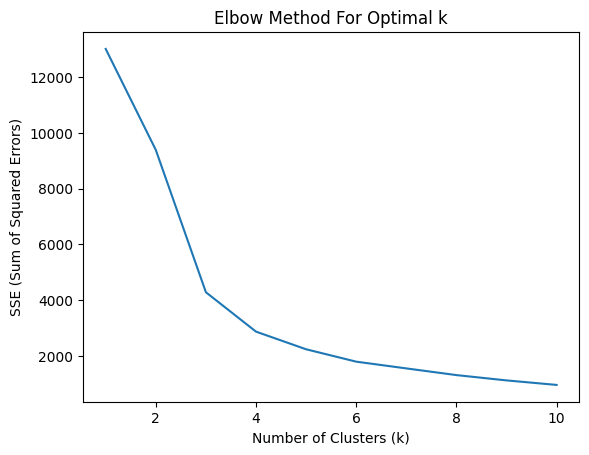

In [90]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_

# Plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("Elbow Method For Optimal k")
plt.show()


Looks like from above, the `k` is 3 or 4 (both works), but I'll pick 3.

In [91]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(rfm_scaled)
rfm['Cluster'] = kmeans.labels_ # each customer is not assigned a cluster

In [92]:
rfm.groupby('Cluster').mean()

,Recency,Frequency,Monetary
Cluster,,,
0,41.109298,106.167796,321.487436
1,246.677716,27.461326,95.982653
2,2.000000,5807.000000,22893.065000


Now that we have our clusters (which we will visualize later), now we need to cluster again now using [Expectation Maximization Clustering](https://www.youtube.com/watch?v=REypj2sy_5U) (**EM**).

In [93]:
from sklearn.mixture import GaussianMixture
# Try Gaussian Mixture with 4 components (the same k that we used before)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(rfm_scaled)

# predict
rfm['GMM_Cluster'] = gmm.predict(rfm_scaled)


In [94]:
rfm.groupby('GMM_Cluster').mean()

,Recency,Frequency,Monetary,Cluster
GMM_Cluster,,,,
0,43.657419,136.698710,404.880697,0.059355
1,126.635078,25.655331,77.346245,0.379824
2,13.742690,695.093567,2397.780175,0.046784


Now, after GMM, let's start plotting! But, we need to do so using 2-D plot and we can do so using [Principal Component Analysis (PCA)](https://www.youtube.com/watch?v=FgakZw6K1QQ) that redraws the data into a new dimension for plotting purposes for example.

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2 components to so we can better visualize our data
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

rfm['PCA1'] = rfm_pca[:,0]
rfm['PCA2'] = rfm_pca[:,1]

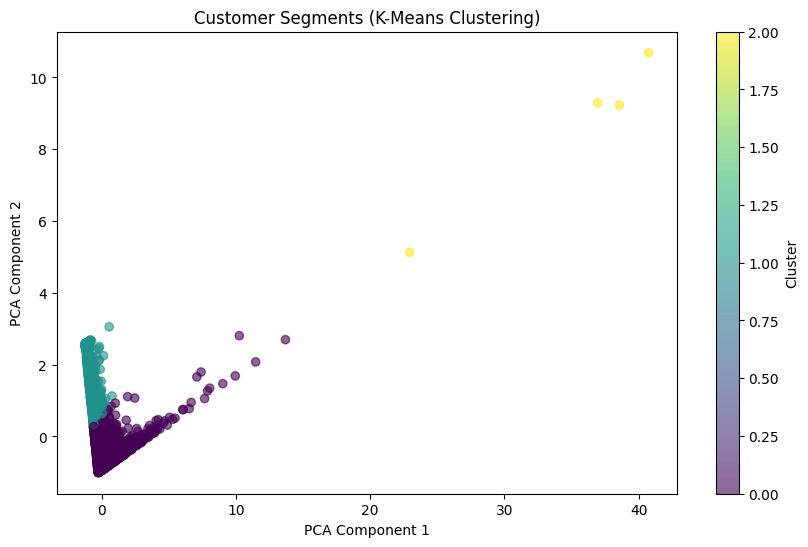

In [96]:
#plotting k-means clustering
plt.figure(figsize=(10,6))
plt.scatter(rfm['PCA1'], rfm['PCA2'], c=rfm['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

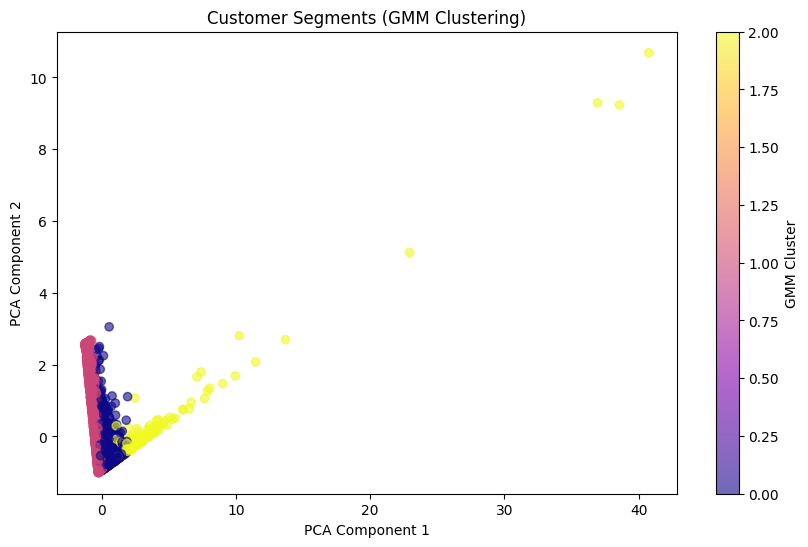

In [97]:
# plotting gmm clustering
plt.figure(figsize=(10,6))
plt.scatter(rfm['PCA1'], rfm['PCA2'], c=rfm['GMM_Cluster'], cmap='plasma', alpha=0.6)
plt.title('Customer Segments (GMM Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='GMM Cluster')
plt.show()


The project analysis and write-up will be a seperate document explaining my interpretation of the results.